## Learn about the effects of outliers

In [23]:
from sklearn import linear_model
from scipy.stats import t,laplace,norm,multivariate_normal
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits import mplot3d
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
%matplotlib inline

In [24]:
#A helper method for pretty-printing linear models
def pretty_print_linear(coefs, intercept, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(1,1+len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return "%6.3f"%intercept+" + " +" + ".join("%6.3f * %s" % (coef, name)
                                   for coef, name in lst)

In [25]:
def learnOLERegression(X,y):
    # Inputs:                                                         
    # X = N x d 
    # y = N x 1                                                               
    # Output: 
    # w = d x 1 
    # IMPLEMENT THIS METHOD
    w = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X)),y)
    return w

In [26]:
def learnRidgeRegression(X,y,lambd):
    # Inputs:
    # X = N x d                                                               
    # y = N x 1 
    # lambd = ridge parameter (scalar)
    # Output:                                                                  
    # w = d x 1                                                                

    # IMPLEMENT THIS METHOD
    w=np.dot(np.dot(np.linalg.inv(np.add(np.dot(np.transpose(X),X),lambd*np.identity(X.shape[1]))),np.transpose(X)),y)
    return w

In [27]:
def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = X x 1
    # Output:
    # mse
    
    # IMPLEMENT THIS METHOD
    mse=np.sum((ytest-np.dot(Xtest,w))**2)/len(Xtest)
    return mse

In [28]:
def regressionObjVal(w, X, y, lambd):

    # compute squared error (scalar) and gradient of squared error with respect
    # to w (vector) for the given data X and y and the regularization parameter
    # lambda                                                                  

    # IMPLEMENT THIS METHOD
    w=np.transpose(np.asmatrix(w))
    error=(0.5)*np.dot(np.transpose(np.subtract(y,np.dot(X,w))),np.subtract(y,np.dot(X,w)))+(0.5)*lambd*np.dot(np.transpose(w),w)
    error_grad=-(np.dot(X.transpose(),(y-np.dot(X,w))))+lambd*w
    error_grad=np.array(error_grad)
    error_grad=np.squeeze(error_grad)
    return error, error_grad


#### generate some data

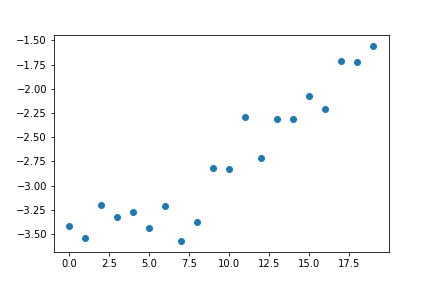

In [22]:
x = np.arange(20)
w = np.array([-3.8,0.11])
y = w[0] + w[1]*x
sigma2 = 0.1
y = y + np.random.normal(0,sqrt(sigma2),x.shape[0])
plt.scatter(x,y)

In [29]:
def calculateSquaredLoss(X,y,w):
    X1 = np.hstack([np.ones([X.shape[0],1]),X])
    ypred = np.dot(X1,w)
    return 0.5*np.sum(np.power(ypred - y,2))

In [30]:
# fit model - note that LinearRegression's fit function adds the intercept by default
x = np.transpose(np.reshape(x,[1,len(x)]))
y = np.transpose(np.reshape(y,[1,len(y)]))
lr = LinearRegression()
lr.fit(x,y)
print("with scipy models",pretty_print_linear(lr.coef_,lr.intercept_))

#### Leaning about the data without using scipy objects

# add intercept
X_i = np.concatenate((np.ones((x.shape[0],1)), x), axis=1)
#Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w_i = learnOLERegression(X_i,y)
mle_traini = testOLERegression(w_i,X_i,y)

#print(w_i[0])
print("without scipy models",pretty_print_linear(w_i[1],w_i[0]))


with scipy models -3.747 +  0.105 * X1
without scipy models -3.747 +  0.105 * X1


## Outliers and its effects

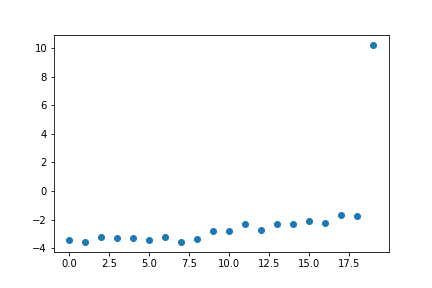

In [31]:
# adding outliers
y[19] = -3*y[0]
plt.scatter(x,y)

In [32]:
# fit model - note that LinearRegression's fit function adds the intercept by default
x = np.transpose(np.reshape(x,[1,len(x)]))
y = np.transpose(np.reshape(y,[1,len(y)]))
lr = LinearRegression()
lr.fit(x,y)
print("with scipy models",pretty_print_linear(lr.coef_,lr.intercept_))


#### Leaning about the data without using scipy objects

# add intercept
X_i = np.concatenate((np.ones((x.shape[0],1)), x), axis=1)
#Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w_i = learnOLERegression(X_i,y)
mle_traini = testOLERegression(w_i,X_i,y)

#print(w_i[0])
print("without scipy models",pretty_print_linear(w_i[1],w_i[0]))


with scipy models -4.761 +  0.274 * X1
without scipy models -4.761 +  0.274 * X1


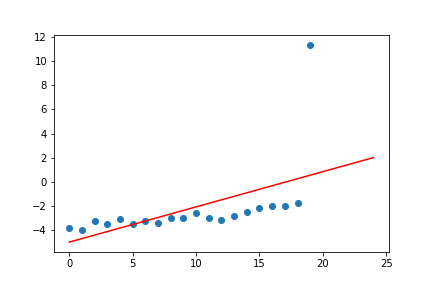

In [15]:
xtest = np.transpose(np.reshape(range(25),[1,len(range(25))]))
ytest = lr.predict(xtest)
plt.scatter(x,y)
plt.plot(xtest, ytest, color="red")

## Using Robust regression

In [33]:
import statsmodels.api as sm
x1 = np.transpose(np.vstack([np.ones(x.shape[0]),x.flatten()]))
# Fit model and print summary
rlm_model = sm.RLM(y, x1, M=sm.robust.norms.HuberT())
w = rlm_model.fit()
w =  w.params
print(pretty_print_linear(w[1:],w[0]))

-3.736 +  0.107 * X1


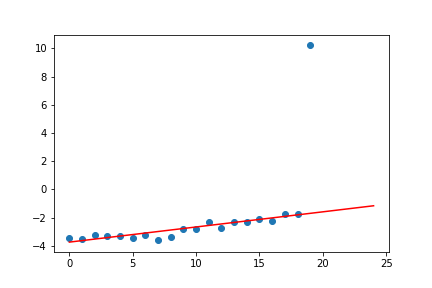

In [34]:
xtest = np.transpose(np.reshape(range(25),[1,len(range(25))]))
ytest = w[0] + w[1]*xtest
plt.scatter(x,y)
plt.plot(xtest, ytest, color="red")

## Implementing Ordinary Least Square Solution and use Ridge Regression

In [18]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from numpy.linalg import det, inv
from math import sqrt, pi
import scipy.io
import matplotlib.pyplot as plt
import pickle
import sys


In [19]:
def mapNonLinear(x,p):

    # Inputs:                                                                  
    # x - a single column vector (N x 1)                                       
    # p - integer (>= 0)                                                       
    # Outputs:                                                                 
    # Xp - (N x (p+1)) 
    Xp=np.ones((x.shape[0],p+1))
    for i in range(p+1):
        Xp[:,i]=pow(x,i)
    return Xp

#### Implement ordinary least squares method to estimate regression parameters by minimizing the squared loss. Implement the function learnOLERegression to learn the weights vector w. Also implement the function testOLERegression to apply the learnt weights for prediction on both training and testing data and to calculate the mean squared error (MSE). Need to calculate the training and test MSE first without using and bias term and then using bias terms.

In [35]:

if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding = 'latin1')

# add intercept
X_i = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(X,y)
mle_train = testOLERegression(w,X,y)
mle = testOLERegression(w,Xtest,ytest)

w_i = learnOLERegression(X_i,y)
mle_traini = testOLERegression(w_i,X_i,y)
mle_i = testOLERegression(w_i,Xtest_i,ytest)

print('MSE train without intercept '+str(mle_train))
print('MSE test with intercept '+str(mle_traini))
print('MSE without intercept '+str(mle))
print('MSE with intercept '+str(mle_i))

MSE train without intercept 19099.44684457055
MSE test with intercept 2187.1602949303892
MSE without intercept 106775.36155354623
MSE with intercept 3707.8401817711774


#### Using the mathematical assumptions implement a function to learn the parameters for ridge regression by minimizing the regularized squared loss. Also need to calculate and report the MSE for training and test data using ridge regression parameters with the help of testOLERegression function that was implemented as part of Problem 2. Using the data with intercept plot the errors on train and test data for different values of λ. Λ is to be varied from 0 (no regularization) to 1 in steps of 0.01. Also compare the relative magnitudes of weights learnt using OLE (Problem 2) and weights learnt using ridge regression. Compare the two approaches in terms of errors on train and test data. Comment on the optimal value for λ.

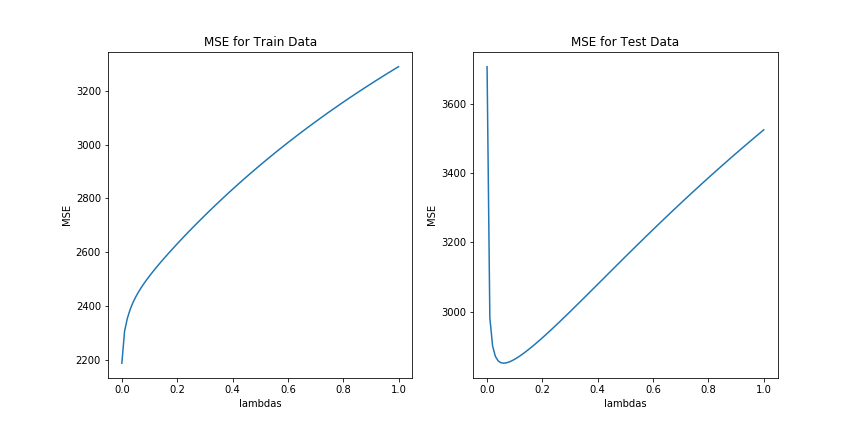

In [36]:
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
mses3_train = np.zeros((k,1))
mses3 = np.zeros((k,1))
for lambd in lambdas:
    w_l = learnRidgeRegression(X_i,y,lambd)
    mses3_train[i] = testOLERegression(w_l,X_i,y)
    mses3[i] = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1
    
#lambda_opt = lambdas[np.where(mses3==min(mses3))[0][0]]
#print("Optimum lambda value =",lambda_opt)
#mse_train = mses3_train[np.where(lambdas==lambda_opt)[0][0]]
#print("MSE train at minimum lambda =",mse_train)
#mse_test = mses3[np.where(lambdas==lambda_opt)[0][0]]
#print("MSE test at minimum lambda =",mse_test)
#w_l = learnRidgeRegression(X_i,y,lambda_opt)
#print("Ridge weights",w_l)
#print("OLE weights",w_i)

fig = plt.figure(figsize=[12,6])
plt.subplot(1, 2, 1)
plt.plot(lambdas,mses3_train)
plt.xlabel("lambdas")
plt.ylabel("MSE")
plt.title('MSE for Train Data')
plt.subplot(1, 2, 2)
plt.plot(lambdas,mses3)
plt.xlabel("lambdas")
plt.ylabel("MSE")
plt.title('MSE for Test Data')

plt.show()